# Exercise 2

In [10]:
import pandas as pd
import sqlite3
with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

### Examine data:

In [11]:
data.columns

Index(['name', 'age', 'weight', 'eyecolor'], dtype='object')

In [12]:
data.shape

(152361, 4)

##### Answer to Exercise 2.1(as shown in readme.md):  It has columns for name, age, weight, and eyecolor. And it has 152361 rows (people).

### Examine the distribution of the ages:

In [69]:
mean_of_ages= data.age.mean()
standard_deviation_of_ages= data.age.std()
minimum_of_ages= data.age.min()
maximum_of_ages= data.age.max()
print(f'mean: {mean_of_ages}')
print(f'standard_deviation: {standard_deviation_of_ages}')
print(f'minimum: {minimum_of_ages}')
print(f'maximum: {maximum_of_ages}')

mean: 39.510527927396524
standard_deviation: 24.152760068601445
minimum: 0.0007476719217636152
maximum: 99.99154733076972


#### Plot histogram of the distribution with an appropriate number of bins for the size of the dataset

In [73]:
! conda install -c conda-forge plotnine -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/amygdk/opt/anaconda3

  added / updated specs:
    - plotnine


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38h50d1736_0        1020 KB  conda-forge
    descartes-1.1.0            |             py_4           7 KB  conda-forge
    mizani-0.7.3               |     pyhd8ed1ab_0          53 KB  conda-forge
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    palettable-3.3.0       

##### Note: I tried to plot with matplotlib and ggplot to see which visualization was better, and ggplot is much better, so for weight I only used ggplot to plot

In [334]:
import plotnine as p9
from plotnine import *

In [233]:
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np

In [3]:
#determining bin number

In [243]:
q25,q75 = np.percentile(data.age, [25, 75])
bin_width = 2 * (q75 - q25) * len(data.age) ** (-1/3)
bins = round((maximum_of_ages - minimum_of_ages) / bin_width)
print(f'bin_number: {bins}')

bin_number: 70


In [4]:
#plot with matplotlib

(array([2827., 2811., 2789., 2888., 2826., 2715., 2982., 2728., 2861.,
        2829., 2813., 2782., 2784., 2906., 2833., 2842., 2861., 2847.,
        2901., 2784., 2879., 2825., 2764., 2910., 2792., 2801., 2812.,
        2807., 2803., 2860., 2776., 2853., 2865., 2843., 2837., 2847.,
        2858., 2826., 2828., 2903., 2845., 2787., 2856., 2750., 2795.,
        2869., 2803., 2733., 2816.,  678.,  651.,  624.,  663.,  691.,
         665.,  626.,  688.,  667.,  644.,  595.,  720.,  626.,  647.,
         654.,  643.,  685.,  633.,  662.,  658.,  689.]),
 array([7.47671922e-04, 1.42918767e+00, 2.85762766e+00, 4.28606766e+00,
        5.71450765e+00, 7.14294765e+00, 8.57138764e+00, 9.99982764e+00,
        1.14282676e+01, 1.28567076e+01, 1.42851476e+01, 1.57135876e+01,
        1.71420276e+01, 1.85704676e+01, 1.99989076e+01, 2.14273476e+01,
        2.28557876e+01, 2.42842276e+01, 2.57126676e+01, 2.71411076e+01,
        2.85695476e+01, 2.99979876e+01, 3.14264276e+01, 3.28548676e+01,
        3.42

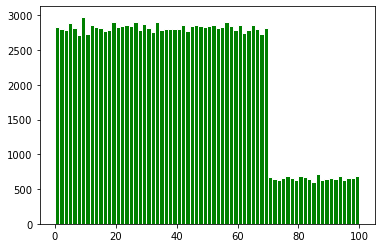

In [244]:
plt.hist(x=data.age, density=False, bins=bins, ec= 'white',color='green')

In [5]:
# plot with ggplot

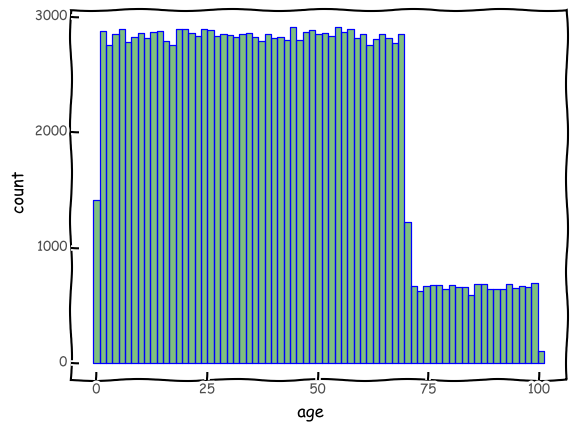

<ggplot: (8789209560408)>

In [255]:
(ggplot(data, aes(x='age'))
 + geom_histogram(binwidth=bin_width,
                 fill='green',
                 colour='blue',
                 size=0.5,
                 alpha=0.5
                 )
 + theme_xkcd()
)

##### role of bin numbers (also in readme.md):the number of bins (associated with binwidth) determine the presentation of the histogram's pattern. If the number is too great, there will be too much details shown on the histogram, so that it is very difficult to recognize the actual pattern of the whole dataset, and it may include noises that divert the pattern to be distracted. If the number of bins gets too low, it tends to oversmooth essential details such as peak counts at one datapoint. Therefore, it is very important to use an appropriate bin number to graph histogram so that the pattern and details of the data can be visualized as being closer to the true data pattern. 

##### specifying regions for patterns

In [280]:
count_table_age= round(data.age).value_counts()

In [289]:
count_table_age = np.logical_and(count_table_age>1000, count_table_age<1500)

In [292]:
count_table_age[count_table_age==True]

70.0    True
Name: age, dtype: bool

#### Comment on any outliers or patterns: People at ages from 0 to approximately 70 have similar counts, while those at age 70-100 have similar counts, this shows a segmented pattern for people at ages below 70 and above 70.

### Examine the distribution of the weights:

In [198]:
mean_of_weights= data.weight.mean()
standard_deviation_of_weights= data.weight.std()
minimum_of_weights= data.weight.min()
maximum_of_weights= data.weight.max()
print(f'mean: {mean_of_weights}')
print(f'standard_deviation: {standard_deviation_of_weights}')
print(f'minimum: {minimum_of_weights}')
print(f'maximum: {maximum_of_weights}')

mean: 60.88413415993031
standard_deviation: 18.411824265661494
minimum: 3.3820836824389326
maximum: 100.43579300336947


#### Plot histogram of the distribution with an appropriate number of bins for the size of the dataset

In [227]:
q25,q75 = np.percentile(data.weight, [25, 75])
bin_width_weight = 2 * (q75 - q25) * len(data.weight) ** (-1/3)
bins_weight = round((maximum_of_weights - minimum_of_weights) / bin_width_weight)
print(f'bin_number: {bins}')

bin_number: 196


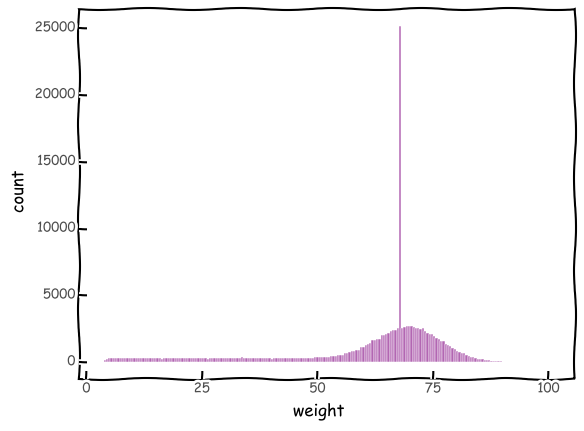

<ggplot: (8789191243216)>

In [200]:
(ggplot(data, aes(x='weight'))
 + geom_histogram(binwidth=bin_width_weight,
                 fill='purple',
                 colour='white',
                 size=0.2,
                 alpha=0.6
                 )
 + theme_xkcd()
)

##### specifying regions for patterns

In [511]:
data['weight'].value_counts()

68.000000    22613
73.104595        1
54.951453        1
35.978364        1
71.831014        1
             ...  
61.768055        1
66.071491        1
59.401400        1
39.040271        1
59.042765        1
Name: weight, Length: 129749, dtype: int64

#### Comment on any outliers or patterns: According to the distribution shown on histogram, those with weight lower than 50 has a rather leveled and low counts, while for those with weight greater than 50 has a distribution similar to standard distribution,except for the outlier when weight equals to 68.0 (rounded) with count of 27842.

#### Scatter plot of weights vs. ages

[Text(0.5, 1.0, 'weight vs. age'), Text(0.5, 0, 'age'), Text(0, 0.5, 'weight')]

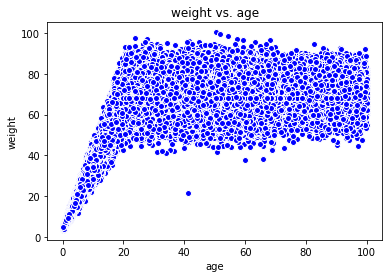

In [512]:
plt.scatter(x= data.age, y= data.weight, c= 'blue',edgecolors='white')
plt.gca().update(dict(title='weight vs. age', xlabel='age', ylabel='weight'))

##### General relationship between the two variables: their relationship is generally following a positive trend. For weight lower than 40, the relationship between two variables are strongly positive;however, after weight=40, the relationship follows a weakly positive trend, with points strongly scattered.

#### The outlier that doesn't follow relationship:

In [346]:
data[(data['age']>40)& (data['age']<42) &(data['weight']>20) &(data['weight']<22)]

,name,age,weight,eyecolor
537,Anthony Freeman,41.3,21.7,green


##### The outlier's name is Anthony Freeman.
##### Visualizing the scatter plot that demonstrates the relationship of weight and age allows the selection of the outlier-->According to it's rough ranges of the coordinations for the outlier shown on the plot, as shown above in code [346],the person was identified. 